
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## Decisiones

- Decidimos utilizar: 
"Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como:..."

- Decidimos trabajar con el salario BRUTO en vez del neto dado que hay menos usuarios que tengan un valor '0'. Habiendo 254 personas con '0' en NETO y 14 con '0' en BRUTO

- Decidimos que los salarios altos son los que superan el percentil 75

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                                          Python
1    CSS, HTML, Java, Javascript, SQL, TypeScript
2                         Javascript, PHP, Python
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Filtrado de filas
df_notremote_full = df[(df['work_dedication']=='Full-Time') & (df['work_contract_type'] != 'Remoto (empresa de otro país)')]

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

df_notremote_full.loc[:, 'cured_programming_languages'] = df_notremote_full.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')
  
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang_notremote_full = df_notremote_full.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})


# Remove entries without programming languages
df_lang = df_lang[df_lang.cured_programming_languages.apply(lambda x: x != [])]
df_lang_notremote_full = df_lang_notremote_full[df_lang_notremote_full.cured_programming_languages.\
                                                apply(lambda x: x != [])]
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

<ipython-input-7-c703b2543d86>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notremote_full.loc[:, 'cured_programming_languages'] = df_notremote_full.tools_programming_languages\
<ipython-input-7-c703b2543d86>:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series).stack()\
<ipython-input-7-c703b2543d86>:36: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series).stack()\


,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
0,python,Python,300000.0,[python]
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",900000.0,"[css, html, java, javascript, sql, typescript]"
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",900000.0,"[css, html, java, javascript, sql, typescript]"
1,java,"CSS, HTML, Java, Javascript, SQL, TypeScript",900000.0,"[css, html, java, javascript, sql, typescript]"
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",900000.0,"[css, html, java, javascript, sql, typescript]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

language_count_notremote_full = df_lang_notremote_full.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
0,python,Python,300000.0,[python]
2,python,"Javascript, PHP, Python",120000.0,"[javascript, php, python]"
13,python,"Bash/Shell, Python, SQL",625000.0,"[bash/shell, python, sql]"
15,python,"Bash/Shell, HTML, Javascript, PHP, Python, Typ...",380000.0,"[bash/shell, html, javascript, php, python, ty..."
18,python,"CSS, HTML, Java, Python, SQL",50000.0,"[css, html, java, python, sql]"


Veamos cual es la distribucion en los lenguajes con salarios altos y el porcentaje que repesentan dentro de esta muestra. Como aclaramos antes en nuestras decisiones, consideramos el salario bruto y los que estan encima del percentil 75 para analizar los salarios altos.

In [ ]:
low_quant = df["salary_monthly_BRUTO"].quantile(0.75)
high_quant = df["salary_monthly_BRUTO"].quantile(0.95)
highest_salary_people_count = len(df[df["salary_monthly_BRUTO"] > low_quant])

df_lang_curated = df_lang[df_lang["salary_monthly_BRUTO"] > low_quant]
language_count = df_lang_curated.programming_language.value_counts()\
   .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count["percentage"] = language_count["frequency"]/highest_salary_people_count*100
language_count = language_count[:11]
print(language_count)

      language  frequency  percentage
0   javascript        586   43.731343
1       python        500   37.313433
2          sql        467   34.850746
3         html        321   23.955224
4         java        288   21.492537
5   typescript        280   20.895522
6   bash/shell        270   20.149254
7          css        208   15.522388
8           go        153   11.417910
9         .net        140   10.447761
10         php        140   10.447761


<Axes: xlabel='frequency', ylabel='language'>

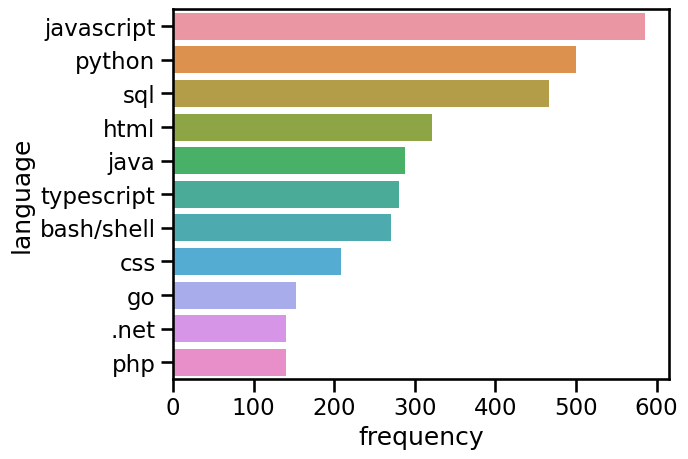

In [ ]:
high_quant = df["salary_monthly_BRUTO"].quantile(0.95)
low_quant = df["salary_monthly_BRUTO"].quantile(0.75)
df_lang_curated = df_lang[df_lang["salary_monthly_BRUTO"] > low_quant]
language_count = df_lang_curated.programming_language.value_counts()\
   .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count["percentages"] = language_count["frequency"]/len(df_lang_curated)*100
language_count = language_count[:11]

seaborn.barplot(data=language_count, x="frequency", y="language", orient = "h")

Veamos que la distribucion de los salarios no es normal

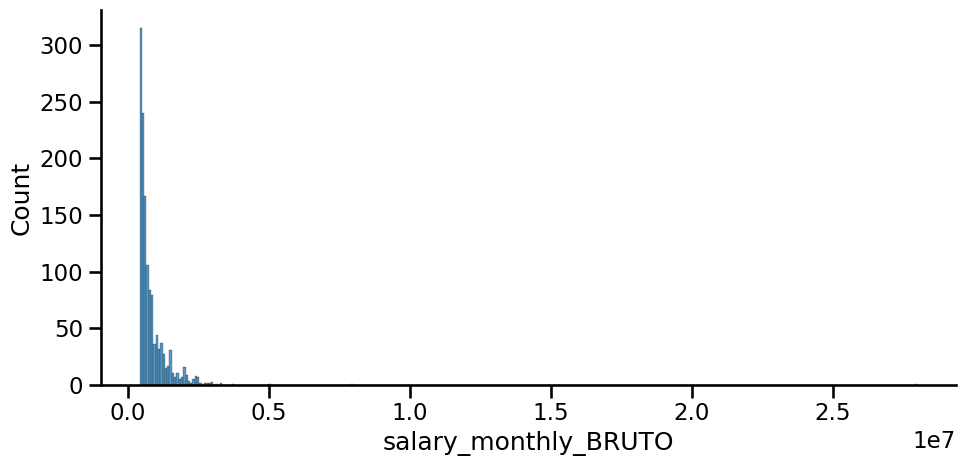

In [ ]:
df_high_salaries = df[df["salary_monthly_BRUTO"] > low_quant]
seaborn.displot(df_high_salaries.salary_monthly_BRUTO, height=5, aspect=2)

Para que la media sea más representativa vamos a remover los valores atipicos, osea el %5 mas alto.

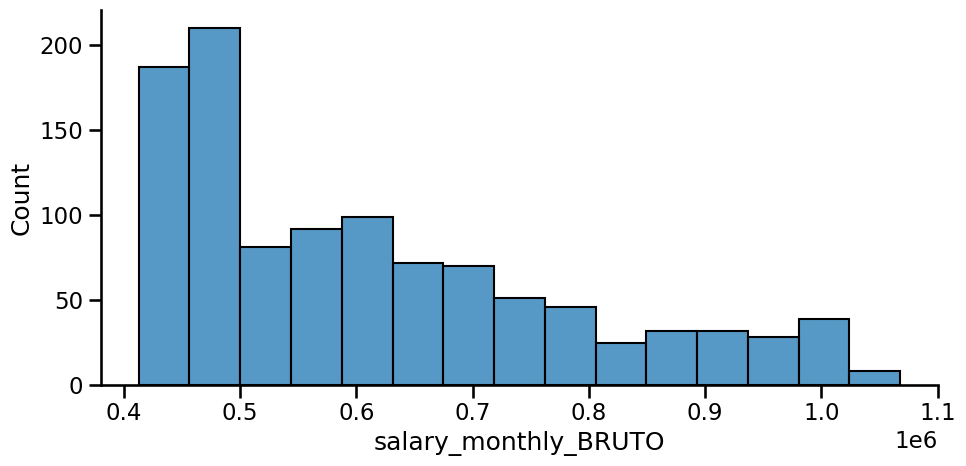

In [ ]:
df_high_salaries = df[df["salary_monthly_BRUTO"].between(low_quant, high_quant)]
seaborn.displot(df_high_salaries.salary_monthly_BRUTO, height=5, aspect=2)

# **Solucion**
### Primer caso:
Veamos las diferecias entre los salarios promedio de los 2 lenguajes de programacion mas populares entre los salarios mas altos. Y luego si algunas combinaciones de los 4 lenguajes mas populares de la muestra aportan al salario promedio.

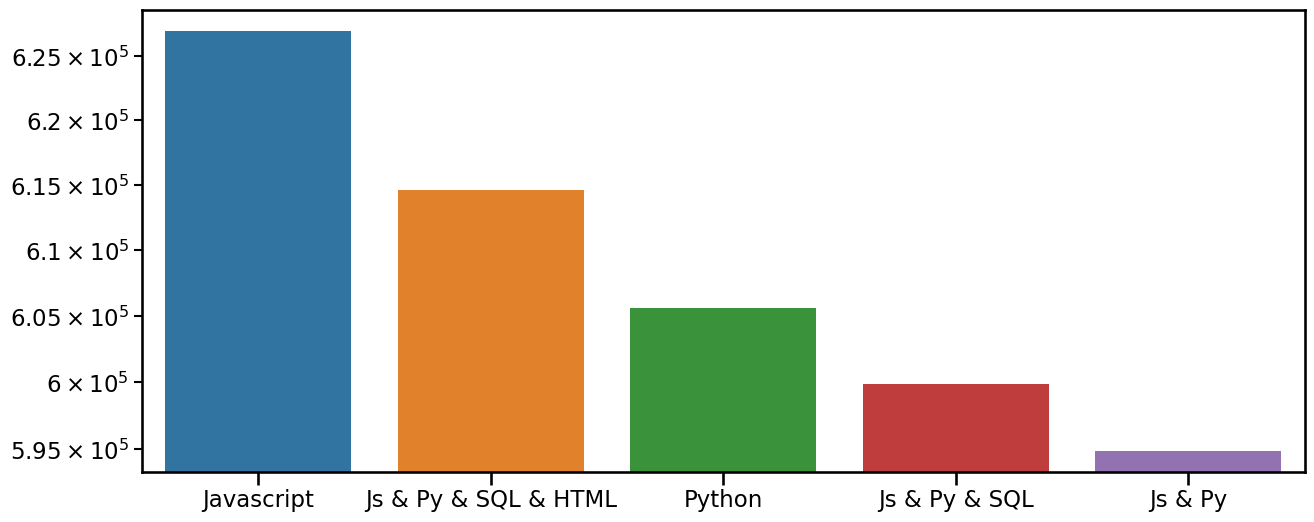

In [ ]:
mean_list = []
df_js_only = df_high_salaries[df_high_salaries.cured_programming_languages.apply(lambda languages: 'javascript' in languages)]
js_only_mean = df_js_only.salary_monthly_BRUTO.mean()
mean_list.append(js_only_mean)

df_top_4_only = df_high_salaries[df_high_salaries.cured_programming_languages.apply(lambda languages: 'python' in languages and 'javascript' in languages and 'sql' in languages and 'html' in languages)]
top_4_only_mean = df_top_4_only.salary_monthly_BRUTO.mean()
mean_list.append(top_4_only_mean)

df_python_only = df_high_salaries[df_high_salaries.cured_programming_languages.apply(lambda languages: 'python' in languages)]
python_only_mean = df_python_only.salary_monthly_BRUTO.mean()
mean_list.append(python_only_mean)


df_top_3_only = df_high_salaries[df_high_salaries.cured_programming_languages.apply(lambda languages: 'python' in languages and 'javascript' in languages and 'sql' in languages)]
top_3_only_mean = df_top_3_only.salary_monthly_BRUTO.mean()
mean_list.append(top_3_only_mean)

df_top_2_only = df_high_salaries[df_high_salaries.cured_programming_languages.apply(lambda languages: 'python' in languages and 'javascript' in languages)]
top_2_only_mean = df_top_2_only.salary_monthly_BRUTO.mean()
mean_list.append(top_2_only_mean)

case_list = ["Javascript", "Js & Py & SQL & HTML", "Python", "Js & Py & SQL", "Js & Py"]

fig, ax = plt.subplots(figsize=(15, 6))
g = seaborn.barplot(data=language_count, x=case_list, y=mean_list, ax = ax, )
g.set_yscale("log")

Veamos que el salario mas alto lo tienen los desarrolladores de javascript, luego la combinacion de los 4 mas populares de la muestra y salarios muy parecidos entre los desarolladores de Python y combinaciones de los 3 lenguajes mas populares.

In [ ]:
df_high_salaries.sort_values('salary_monthly_BRUTO', ascending=False).cured_programming_languages[:20]

4530                                   [java, javascript]
1453                  [javascript, kotlin, python, swift]
4228           [go, java, javascript, kotlin, typescript]
1402                              [bash/shell, java, sql]
4079                                      [.net, c#, sql]
236                             [javascript, python, sql]
2368                                   [html, javascript]
2748                                      [.net, c#, sql]
913                      [javascript, kotlin, typescript]
2161                                   [java, javascript]
2887                                                   []
2659                            [bash/shell, python, sql]
1622                                   [javascript, ruby]
2513                                                   []
401     [bash/shell, html, javascript, php, sql, types...
452                 [bash/shell, javascript, python, sql]
2754       [.net, c#, css, html, javascript, python, sql]
3841          

###Segundo caso

<Axes: >

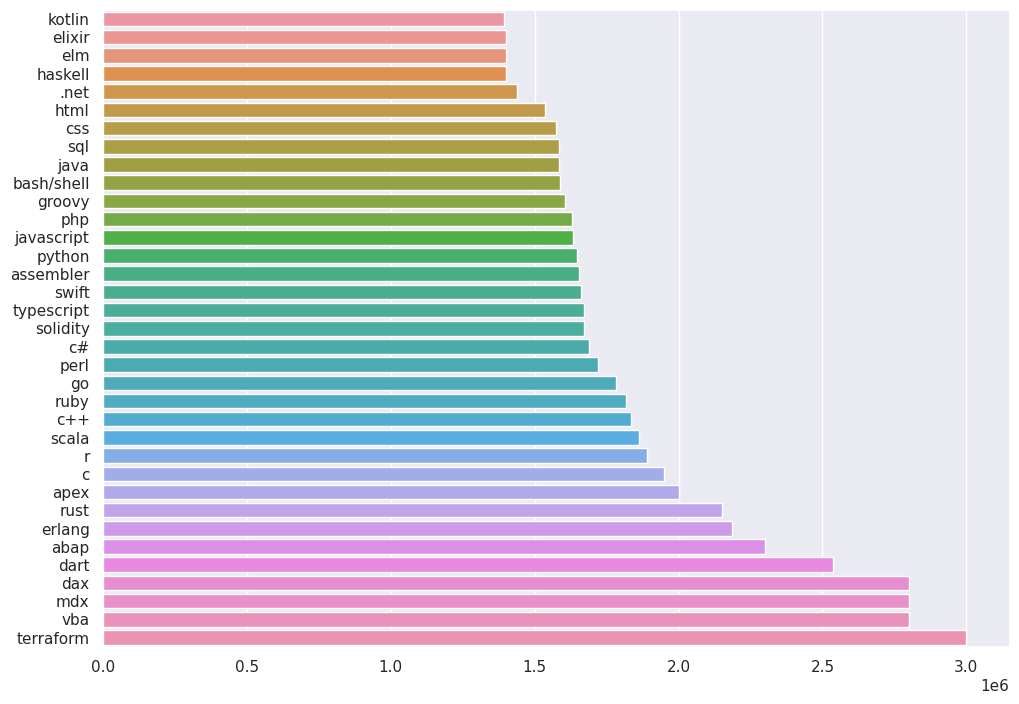

In [ ]:
#Ahora quiero ver que lenguajes hay en el top %5 de los salarios, recortando outliers.
quant_95_BRUTO = df["salary_monthly_BRUTO"].quantile(0.95)
quant_99_BRUTO = df["salary_monthly_BRUTO"].quantile(0.999)
df_lang_high_salary = df_lang[df_lang["salary_monthly_BRUTO"].between(quant_95_BRUTO, quant_99_BRUTO)]

language_count_high_salary = df_lang_high_salary.programming_language.value_counts()\
   .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
high_salary_language_list = language_count_high_salary.language.tolist()
high_salary_language_list.remove("&")
high_salary_language_list.remove("y")
high_salary_language_list.remove(":)")
high_salary_language_list.remove("excel")
high_salary_language_list.remove("zoom")

languages_salary_mean = []
for language in high_salary_language_list:
  filtered_df_lang = df_lang_high_salary[df_lang_high_salary.programming_language == language]
  salary_mean = filtered_df_lang["salary_monthly_BRUTO"].mean()
  languages_salary_mean.append((salary_mean, language))

languages_salary_mean = sorted(languages_salary_mean)

langs = []
s_means = []
for item in languages_salary_mean:
   langs.append(item[1])
   s_means.append(item[0])

seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.barplot(x = s_means, y = langs, orient = "h")

Tomando en cuenta el lenguaje mas frecuente en los salarios mas altos;
- Cual es la probabilidad de estar en los salarios mas altos si se sabe este lenguaje?
- Y sabiendo el lenguaje de los que cobran mas en los salarios mas altos?


In [ ]:
salary_col = 'salary_monthly_BRUTO'

df_java  = df[df.tools_programming_languages.str.contains('Javascript', regex=False).fillna(False)]
df_terra = df[df.tools_programming_languages.str.contains('Terraform', regex=False).fillna(False)]

prob_above_java  = len(df_java[df_java[salary_col] >= low_quant]) / len(df_java)
prob_above_terra = len(df_terra[df_terra[salary_col] >= low_quant]) / len(df_terra)

print('Probabilidad si se sabe Javascript:', prob_above_java*100, '% \nProbabilidad si se sabe Terraform:', prob_above_terra*100, '%\n')
print('Porcentaje del total que saben Javascript:', len(df_java)*100/len(df), '%\nPorcentaje del total que saben Terraform:', len(df_terra)*100/len(df), '%')

Probabilidad si se sabe Javascript: 27.35760971055089 % 
Probabilidad si se sabe Terraform: 66.66666666666666 %

Porcentaje del total que saben Javascript: 39.97760358342665 %
Porcentaje del total que saben Terraform: 0.11198208286674133 %


## Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




#Primer caso
Este consiste en la validación de la hipotesis sencilla de que a medida que los años en una empresa aumenta, los salarios lo hacen de la misma forma y si se da por igual entre los diferentes niveles de educacion.

- Obtenemos los datos que vamos a necesitar y filtramos outliers.


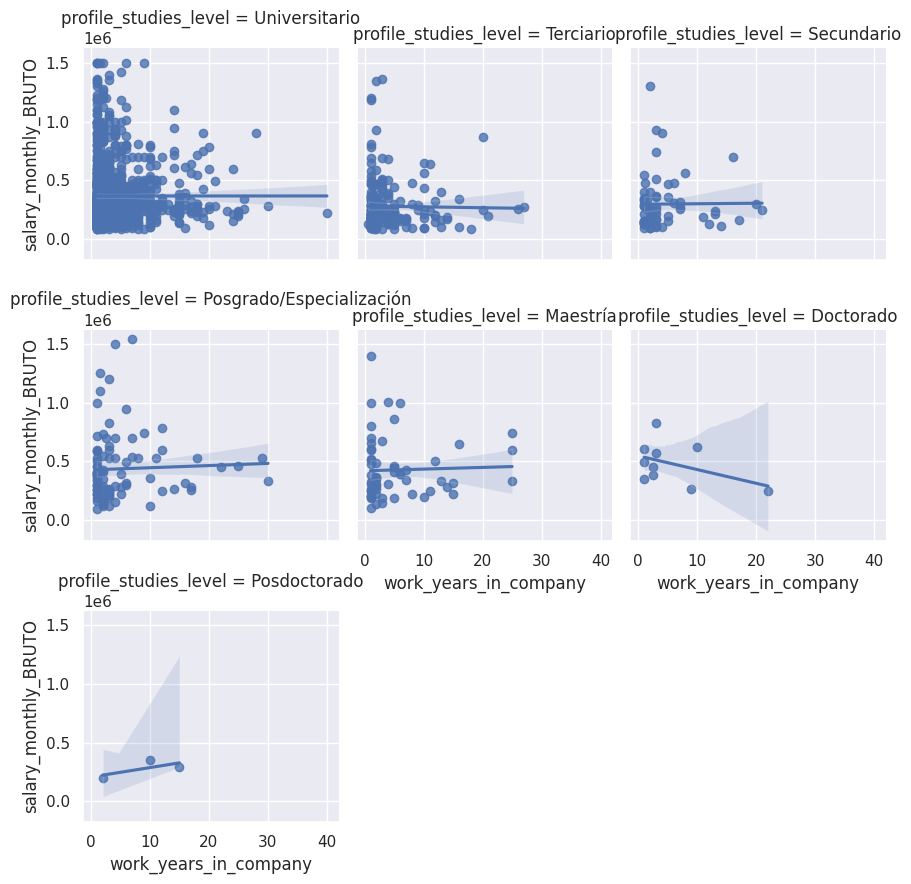

In [ ]:
case_df = df.filter(items=["profile_studies_level", "work_years_in_company", "salary_monthly_BRUTO"])
case_df = case_df[case_df['work_years_in_company'] < 50]
case_df = case_df[case_df['work_years_in_company'] > 0]
case_df = case_df[case_df['salary_monthly_BRUTO'] < df.salary_monthly_BRUTO.quantile(0.98)]
case_df = case_df[case_df['salary_monthly_BRUTO'] > df.salary_monthly_BRUTO.quantile(0.1)]
seaborn.lmplot(x="work_years_in_company", y="salary_monthly_BRUTO", col="profile_studies_level", data=case_df, col_wrap=3, height=3)

In [ ]:
import scipy.stats
studies_list = case_df.profile_studies_level.unique().tolist()
studies_list = [x for x in studies_list if str(x) != 'nan']

# https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson
def corr_pearson_salary(df, studies_level):
    return scipy.stats.pearsonr(df[df.profile_studies_level == studies_level].work_years_in_company,
                                df[df.profile_studies_level == studies_level].salary_monthly_BRUTO)[0]

pearson_r = [[tmp, corr_pearson_salary(case_df, tmp)] for tmp in studies_list]
pearson_r = pd.DataFrame(pearson_r, columns=[ 'province', 'pearson_r'])
print(pearson_r)


# https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
def corr_spearman_salary(df, studies_level):
    return scipy.stats.spearmanr(
        df[df.profile_studies_level == studies_level].work_years_in_company,
        df[df.profile_studies_level == studies_level].salary_monthly_BRUTO)[0]

spearman_r = [[tmp, corr_spearman_salary(case_df, tmp)] for tmp in studies_list]
spearman_r = pd.DataFrame(spearman_r, columns=[ 'province', 'spearman_r'])
print('\n', spearman_r)

                   province  pearson_r
0             Universitario   0.000170
1                 Terciario  -0.016468
2                Secundario   0.009799
3  Posgrado/Especialización   0.039292
4                  Maestría   0.035075
5                 Doctorado  -0.432514
6              Posdoctorado   0.696863

                    province  spearman_r
0             Universitario    0.075669
1                 Terciario    0.019650
2                Secundario    0.138576
3  Posgrado/Especialización    0.122158
4                  Maestría    0.037337
5                 Doctorado   -0.129652
6              Posdoctorado    0.500000


Se puede ver que no se cumple la hipotesis, ya que el coeficiente de correlación lineal entre la edad y los salarios en todas las provincias se mantiene en valores bajos al igual que los coeficientes de spearman, lo cual nos indica que no hay correlación lineal ni tampoco se parece a una función monótona.



#Segundo caso
Se propone analizar la distribucion de los años de experiencia en las distintas modalidades de trabajo.

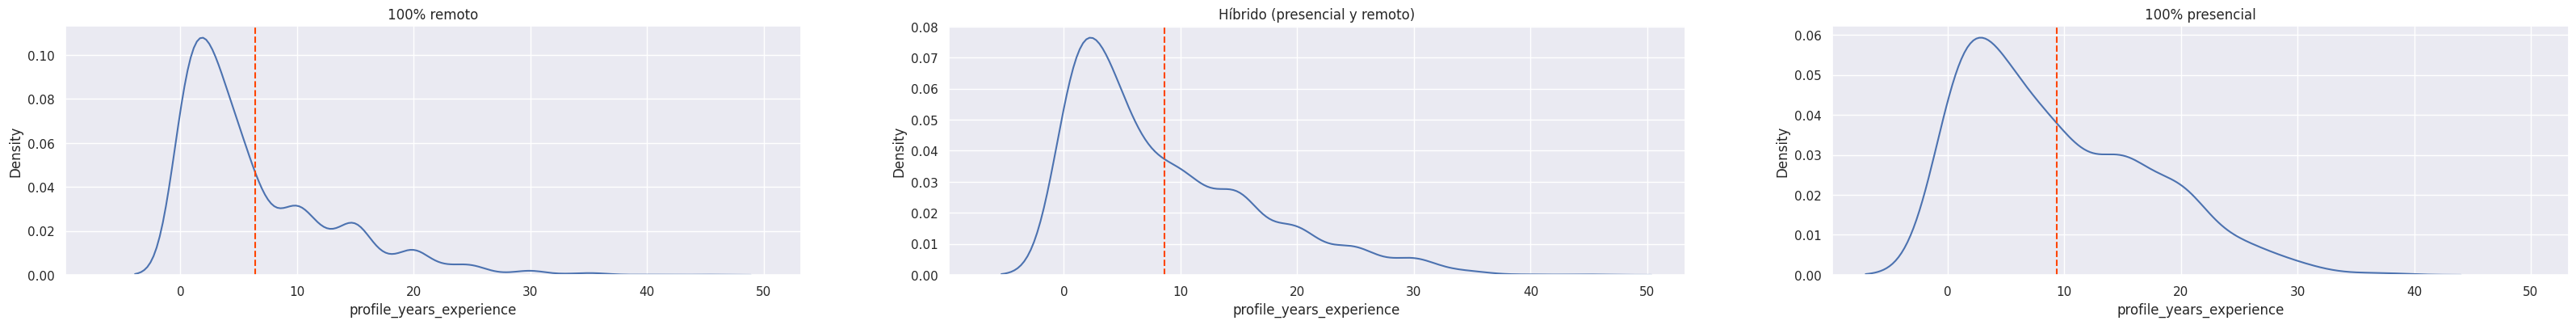

In [ ]:
case2_df = df.filter(items=["work_work_modality", "profile_years_experience"])
mods = case2_df["work_work_modality"].unique()
figure1, axes = plt.subplots(1, 3, figsize=(40, 4), sharex=True)
ax = axes.flatten()

for i in range(len(mods)):
  seaborn.kdeplot(x="profile_years_experience", data=case2_df[case2_df["work_work_modality"] == mods[i]], ax = ax[i])
  ax[i].axvline(case2_df[case2_df["work_work_modality"] == mods[i]].profile_years_experience.mean(),
                                                    color='orangered', linestyle='--', label='Media')
  ax[i].title.set_text(mods[i])

Podemos ver que la media de años de experiencia en las personas que trabajan de forma remota es menor a la de las demas modalidades.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Filtramos un poco los datos:
* Eliminamos outliers (sueldos mayores a 1M)
* Eliminamos filas con valores nulos de salario bruto o neto
* Eliminamos filas con salario bruto o neto igual a 0

Como primera medidad podemos calcular el coeficiente de correlacion. Un valor cercano 1 nos diria que ambas variables estan correlacionadas. En este caso el valor es de 0.93

In [ ]:
df_salaries = df.dropna(subset=['salary_monthly_BRUTO', 'salary_monthly_NETO'])
df_salaries = df_salaries[df_salaries['salary_monthly_BRUTO'] < 1000000]
df_salaries = df_salaries[(df_salaries['salary_monthly_BRUTO'] != 0) & (df_salaries['salary_monthly_NETO'] != 0)]
correlation = df_salaries['salary_monthly_BRUTO'].corr(df_salaries['salary_monthly_NETO'])
correlation

0.736623990091232

Tambien podemos analizar la correlacion usando un ScatterPlot. Podemos ver que ambas variables estan correlacionadas porque el grafico muestra los puntos agrupados alrededor de una linea bien definida

<ipython-input-22-78a0b12cb48f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


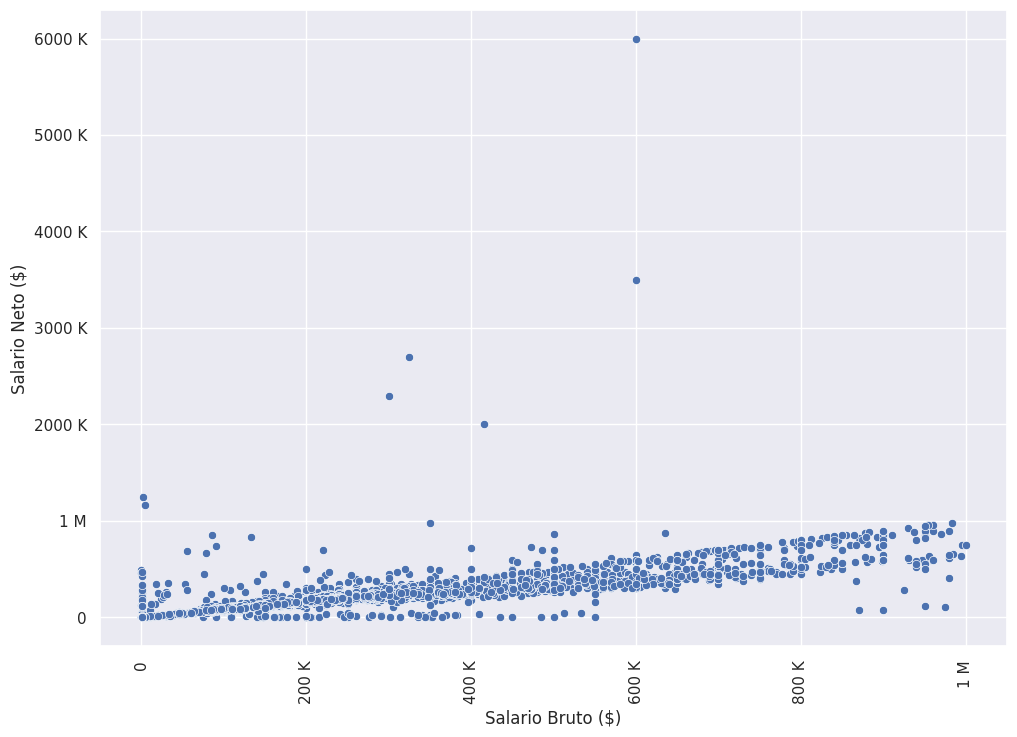

In [ ]:
from matplotlib.ticker import FuncFormatter


def currency_formatter(x, _):
    if x == 0:
        return 0
    elif x == 1000000:
        return '1 M'
    else:
        return f"{int(x/1000)} K"


plot = seaborn.scatterplot(data=df_salaries, x='salary_monthly_BRUTO', y='salary_monthly_NETO')
plot.set_xlabel('Salario Bruto ($)')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_ylabel('Salario Neto ($)')
plot.xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plot.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
# Primero miramos las variables asociados al nivel de estudio y creamos una variable count
# para facilitar el conteo

df_studies = df
df_studies['count'] = 1
df_studies.groupby(['profile_studies_level']).count()['count']

# Decidimos crear una nueva variable que considere tanto el nivel educativo
# como el estado

df_studies['studies_completeness'] = df_studies['profile_studies_level'] + " " + df_studies['profile_studies_level_state']
df_studies['studies_completeness'].dropna().unique()
df_studies.loc[:,'studies_completeness'] = df_studies.studies_completeness.replace({'Universitario Completo': 'Universitario Completo', 'Terciario Incompleto' : 'Terciario Incompleto',
       'Universitario En curso': 'Universitario Incompleto', 'Secundario Completo': 'Secundario Completo',
       'Universitario Incompleto': 'Universitario Incompleto', 'Terciario En curso': 'Terciario Incompleto',
       'Posgrado/Especialización Completo': 'Posgrado/Especialización Completo', 'Terciario Completo': 'Terciario Completo',
       'Maestría Incompleto': 'Maestría Incompleto', 'Maestría En curso': 'Maestría Incompleto', 'Doctorado Incompleto': 'Doctorado Incompleto',
       'Maestría Completo': 'Maestría Completo', 'Posgrado/Especialización En curso': 'Posgrado/Especialización Incompleto',
       'Doctorado En curso': 'Doctorado Incompleto', 'Doctorado Completo': 'Doctorado Completo',
       'Secundario Incompleto': 'Secundario Incompleto', 'Posgrado/Especialización Incompleto': 'Posgrado/Especialización Incompleto',
       'Posdoctorado Completo': 'Posdoctorado Completo', 'Secundario En curso': 'Secundario Incompleto'}).fillna(False)
df_studies['studies_completeness'].unique()

# Una vez hecho esto subdividimos la población en 2 según el nivel de estudio. Recategorizamos la
# variable creada en el paso previo y pasamos a tener 2 categorías: 'Muy Formado', que incluye
# todos los que hayan terminado la universidad (por lo menos) o que hayan empezado o terminado estudios de posgrado.
# Dentro de 'Poco Formado' están los que no llegaron a terminar estudios de grado.

df_studies.loc[:,'studies_two_cat'] = df_studies.studies_completeness.replace({'Universitario Completo': 'Muy Formado', 'Terciario Incompleto': 'Poco Formado',
       'Universitario Incompleto': 'Poco Formado', 'Secundario Completo': 'Poco Formado',
       'Posgrado/Especialización Completo': 'Muy Formado', 'Terciario Completo': 'Poco Formado',
       'Maestría Incompleto': 'Muy Formado', 'Doctorado Incompleto': 'Muy Formado', 'Maestría Completo': 'Muy Formado',
       'Posgrado/Especialización Incompleto': 'Muy Formado', 'Doctorado Completo': 'Muy Formado',
       'Secundario Incompleto': 'Poco Formado', 'Posdoctorado Completo': 'Muy Formado'}).fillna(False)
df_studies['studies_two_cat'].unique()

df_studies.groupby(['studies_two_cat']).count()['count'] 

# Esta gran división nos permitió obtener dos grupos diferentes en tamaño.
# Hay 973 programadores encuestados muy formados y 1686 poco formados

studies_two_cat
False           2699
Muy Formado      973
Poco Formado    1686
Name: count, dtype: int64

Ahora hacemos los dos histogramas para comparar la distribución de salarios de ambos subconjuntos de la población. Decidimos no considerar a aquellos que respondieron que perciben entre \$0 y $1000 pesos. El primer histograma corresponde a los programadores Poco Formados, y parece tener una asimetría derecha más marcada. Además, para valores de entre \$75.000 y \$250.000 aproximadamente, la distribución es más uniforme. Por otro lado, al analizar el histograma para los Muy Formados, se verifica un bin modal bastante marcado.

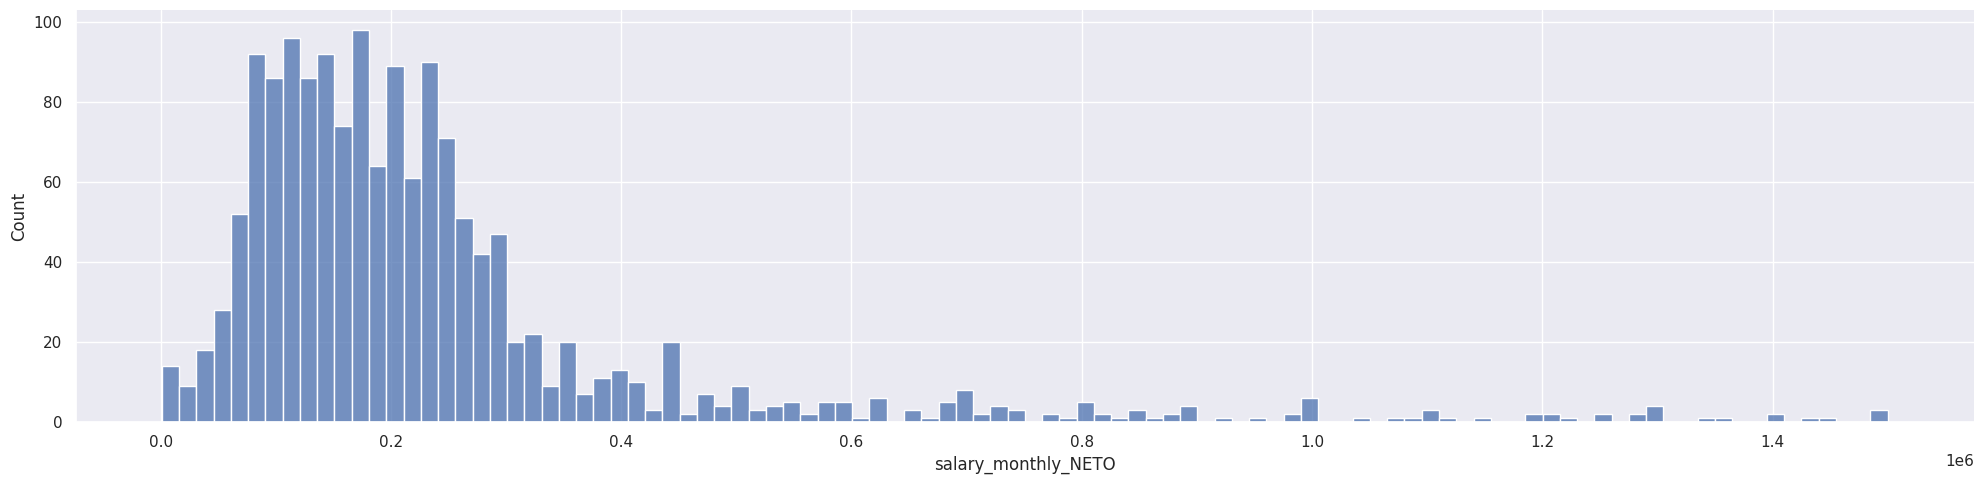

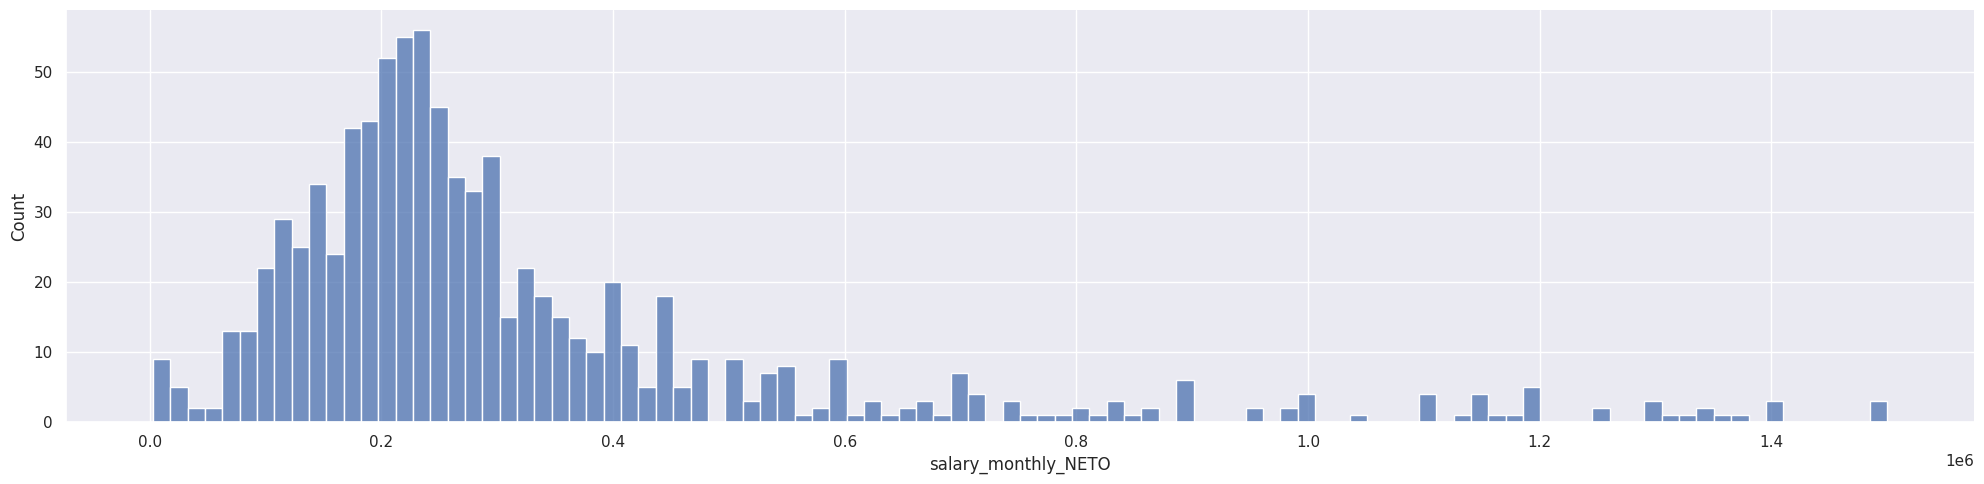

In [ ]:
seaborn.displot(df_studies.salary_monthly_NETO[(df_studies.studies_two_cat == 'Poco Formado') & (df_studies.salary_monthly_NETO.between(1000, 1500000))].dropna(),
                 stat='count', aspect=4, bins = 100)
seaborn.displot(df_studies.salary_monthly_NETO[(df_studies.studies_two_cat == 'Muy Formado') & (df_studies.salary_monthly_NETO.between(1000, 1500000))].dropna(),
                 stat='count', aspect=4, bins = 100)

Para saber si dos variables numéricas son independientes solemos recurrir a la covarianza y al coefiente de Correlacion de Pearson, y a su vez a un gráfico de dispersión o scatterplot.

El problema es que en este caso el nivel educativo es una variable categórica, que a su vez fue dicotomizada, por lo que no podemos recurrir a esas alternativas. Una opción sería calcular la media o la mediana del salario neto de ambas subpoblaciones y hacer un test de diferencia de medias. Podríamos tener como hipótesis nula que el salario neto promedio de los muy formados ($\mu_M$) es mayor o igual al de los poco formados ($\mu_P$), y como alternativa que el salario neto promedio de los muy formados es mayor que el de los poco formados. Si se rechaza la hipótesis nula (p-value < 0.05) podemos afirmar que los más formados ganan significativamente más que los menos formados. Esto implicaría (aunque no necesariamente) que el salario aumenta con el nivel educativo, y por ende que estas dos variables están positivamente correlacionadas (no son independientes).

Como se ve a continuación, el salario neto promedio de los poco formados es menor (\$242.373) al de los muy formados (\\$340.332). Faltaría llevar adelante el test para verificar si esta diferencia es estadísticamente significativa.

También existen test de correlación para cuando se cuenta con una variable dicotómica y otra numérica, como el coeficiente de correlación biserial puntual.

In [ ]:
df_studies.salary_monthly_NETO[df.studies_two_cat == 'Poco Formado'].median(), df_studies.salary_monthly_NETO[df_studies.studies_two_cat == 'Muy Formado'].median()
df_studies.salary_monthly_NETO[df.studies_two_cat == 'Poco Formado'].mean(), df_studies.salary_monthly_NETO[df_studies.studies_two_cat == 'Muy Formado'].mean()


(242373.00539739028, 340332.8277903391)

Otra alternativa es emplear gráficos que nos ayuden a analizar si efectivamente hay alguna relación entre el nivel educativo y el salario. Por ejemplo, los gráficos siguientes de caja y brazos parecen indicar que efectivamente los que tienen secundario y terciario en curso o completo como máximo nivel de estudios son los que tienen, en promedio, menores salarios, pero a su vez se tienen casos como el de Posgrado Completo, donde el primer cuartil y la mediana son bastante bajos.

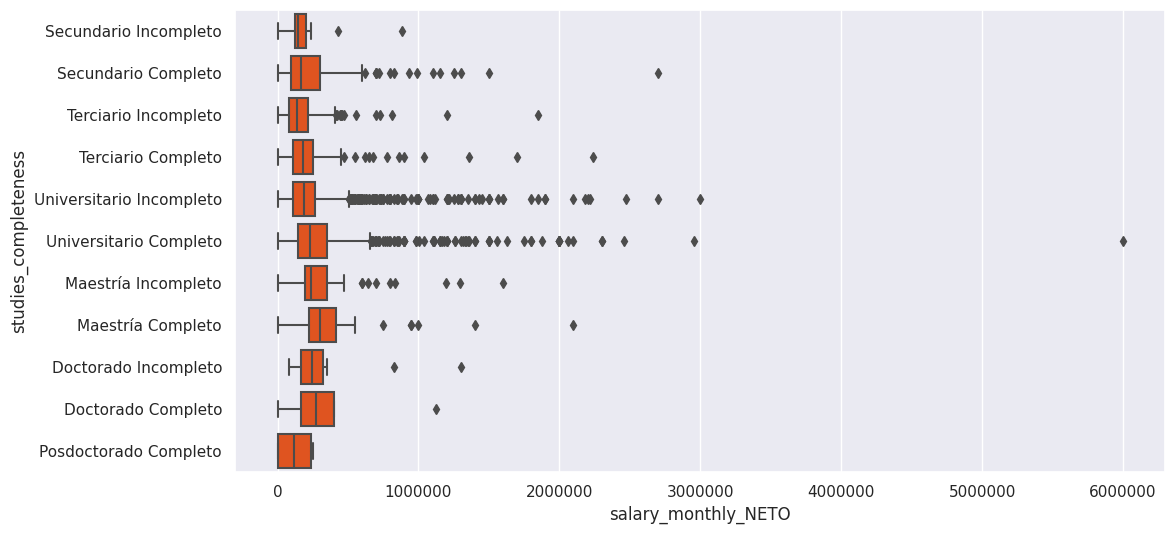

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_studies, x='salary_monthly_NETO', y='studies_completeness',
                order=["Secundario Incompleto","Secundario Completo","Terciario Incompleto","Terciario Completo","Universitario Incompleto","Universitario Completo","Maestría Incompleto","Maestría Completo","Doctorado Incompleto","Doctorado Completo","Posdoctorado Completo"],
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df_studies.groupby('studies_completeness')['salary_monthly_NETO'].median()

#df_studies[df_studies['studies_completeness']=='Secundario Incompleto']['salary_monthly_NETO'].median()

medianas = [['Secundario Incompleto',df_studies[df_studies['studies_completeness']=='Secundario Incompleto']['salary_monthly_NETO'].median()],
            ['Secundario Completo',df_studies[df_studies['studies_completeness']=='Secundario Completo']['salary_monthly_NETO'].median()],
            ['Terciario Incompleto',df_studies[df_studies['studies_completeness']=='Terciario Incompleto']['salary_monthly_NETO'].median()],
            ['Terciario Completo',df_studies[df_studies['studies_completeness']=='Terciario Completo']['salary_monthly_NETO'].median()],
            ['Universitario Incompleto',df_studies[df_studies['studies_completeness']=='Universitario Incompleto']['salary_monthly_NETO'].median()],
            ['Universitario Completo',df_studies[df_studies['studies_completeness']=='Universitario Completo']['salary_monthly_NETO'].median()],
            ['Maestría Incompleto',df_studies[df_studies['studies_completeness']=='Maestría Incompleto']['salary_monthly_NETO'].median()],
            ['Maestría Completo',df_studies[df_studies['studies_completeness']=='Maestría Completo']['salary_monthly_NETO'].median()],
            ['Doctorado Incompleto',df_studies[df_studies['studies_completeness']=='Doctorado Incompleto']['salary_monthly_NETO'].median()],
            ['Doctorado Completo',df_studies[df_studies['studies_completeness']=='Doctorado Completo']['salary_monthly_NETO'].median()],
            ['Posdoctorado Completo',df_studies[df_studies['studies_completeness']=='Posdoctorado Completo']['salary_monthly_NETO'].median()]]

tabla_medianas = pd.DataFrame(medianas, columns=['Nivel de estudios','Mediana del salario neto'])
tabla_medianas

,Nivel de estudios,Mediana del salario neto
0,Secundario Incompleto,147070.0
1,Secundario Completo,165500.0
2,Terciario Incompleto,137000.0
3,Terciario Completo,177720.5
4,Universitario Incompleto,189000.0
5,Universitario Completo,230000.0
6,Maestría Incompleto,240000.0
7,Maestría Completo,302500.0
8,Doctorado Incompleto,245000.0
9,Doctorado Completo,272668.0


Por último se revisan las estadístivas descriptivas de ambas subpoblaciones

In [ ]:
des_P = df_studies.salary_monthly_NETO[df.studies_two_cat == 'Poco Formado'].describe()
des_M = df_studies.salary_monthly_NETO[df.studies_two_cat == 'Muy Formado'].describe()

table = pd.concat([des_P, des_M], axis=1)
table.columns = ['Poco Formado', 'Muy Formado']
print(table)

       Poco Formado   Muy Formado
count  1.686000e+03  9.730000e+02
mean   2.423730e+05  3.403328e+05
std    2.932937e+05  4.199901e+05
min    0.000000e+00  0.000000e+00
25%    1.040000e+05  1.540000e+05
50%    1.770000e+05  2.330000e+05
75%    2.600000e+05  3.500000e+05
max    3.000000e+06  6.000000e+06


Además de los salarios promedios, que ya se discutieron (siendo más elevados los de auqellos 'Muy Formados') podemos destacar que la desviación estándar (SD) es bastante elevada en ambos subgrupos. En el caso de los 'Poco Formados', la SD es de \$293.293, cuando la media es de \$242 mil, mientras que en el caso de los 'Muy Formados' la SD es de \$419.901, cuando la media es \$340.000. Una buena medida que se puede emplear cuando se quiere comparar el grado de dispersión entre dos variables es el coefiente de variación (CV), que surge de hacer el cociente entre la SD y la media:
$$CV=\sigma/\bar{X}$$

En el caso de los 'Pocos formados', el CV es 121%, y en el de los 'Muy formados' 123%. Generalmente se considera que un CV mayor a 50% ya puede ser considerado alto, por lo que 121% y 123% los asociamos a una muy alta dispersión. Además, el CV nos permite comparar el grado de dispersión de dos variables. En base a esto, se puede concluir que la dispersión de los salarios de los 'Poco Formados' es levemente menor a las de los 'Muy Formados', pero la diferencia es marginal, por lo que se puede asumir que el grado de dispersión es el mismo.

El percentil 50 es equivalente a la mediana, y en abos casos es menor a la media, lo que verifica que la media es sensible a valores extremos, que en este rubro son muy comunes, como se observa en el histograma. El 50% de los 'Poco Formados' gana menos de \$177.000, y el restante 50% gana por encima de ese valor. El número que divide a la muestra en 2 en e caso de los 'Muy Formados' es \\$233.000.

In [ ]:
CV_poco_formados = 293293/242373*100
CV_muy_formados = 419990/340332*100
print(CV_poco_formados)
print(CV_muy_formados)

121.00894076485417
123.40596828978762


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Se desea estudiar si existe una correlacion entre el salario y los años de experiencia condicinados al estado del nivel de estudio, para esto se graficara en un grafico de scatter las variables de salario bruto vs años de experiencia y se discriminara con colores segun el estado de los estudios del perfil considerando como incompleto en caso de que este en curso.
Sobre este grafico se estudiara si existe una correspondencia entre las variables condicionadas

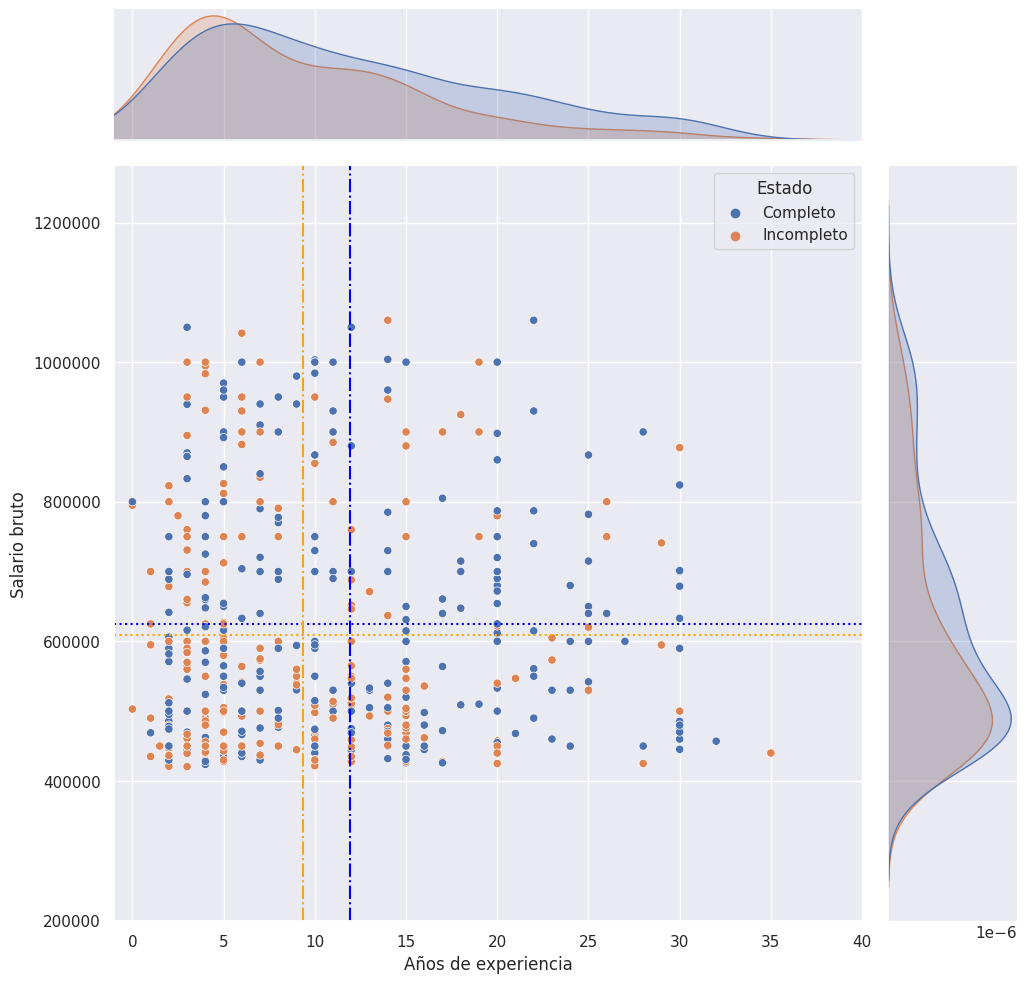

In [ ]:
high_quant = df["salary_monthly_BRUTO"].quantile(0.95)
low_quant = df["salary_monthly_BRUTO"].quantile(0.75)

df_curated = df[df["salary_monthly_BRUTO"] > low_quant]
df_curated = df_curated[df_curated["salary_monthly_BRUTO"] < high_quant]

df_curated.loc[:,'studies'] = df_curated.profile_studies_level_state.replace({'En curso':'Incompleto'})

seaborn.jointplot(data=df_curated.rename(columns={'studies':'Estado'}), x='profile_years_experience', y="salary_monthly_BRUTO", hue='Estado', height=10, xlim=(-1,40))

#MEDIAS COMPLETO
plt.axhline(df_curated[df_curated.studies == 'Completo']["salary_monthly_BRUTO"].mean(), color='blue',
            linestyle=':', label='Media salario\Est. completo')
plt.axvline(df_curated[df_curated.studies == 'Completo'].profile_years_experience.mean(), color='blue',
            linestyle='-.', label='Media experiencia\Est. completo')

#MEDIAS IMCOMPLETO
plt.axhline(df_curated[df_curated.studies == 'Incompleto']["salary_monthly_BRUTO"].mean(), color='orange',
            linestyle=':', label='Media salario\Est. incompleto')
plt.axvline(df_curated[df_curated.studies == 'Incompleto'].profile_years_experience.mean(), color='orange',
            linestyle='-.', label='Media experiencia\Est. incompleto')

plt.ylabel('Salario bruto')
plt.xlabel('Años de experiencia')
plt.ticklabel_format(style='plain', axis='y')


Analizando los resultados, se puede concluir que todos aquellos que acrediten tener sus estudios finalizados, tienen salarios mas altos en promedio y son tambien los que acreditan tener mas años de experiencia laboral.
Estudiando las medias de las distribuciones, se aprecia que aquellos con estudios completos tienen en media un salario mayor sin embargo no se observa una gran diferencia con la media de salario de aquellos con estudios imcompletos.

Dado a que se esta considerando solamente el estado del nivel de estudio actual y no del nivel en si, si se analiza la funcion de densidad conjunta pero ahora considerendo el nivel de estudio completo del perfil se obtiene el siguiente resultado:

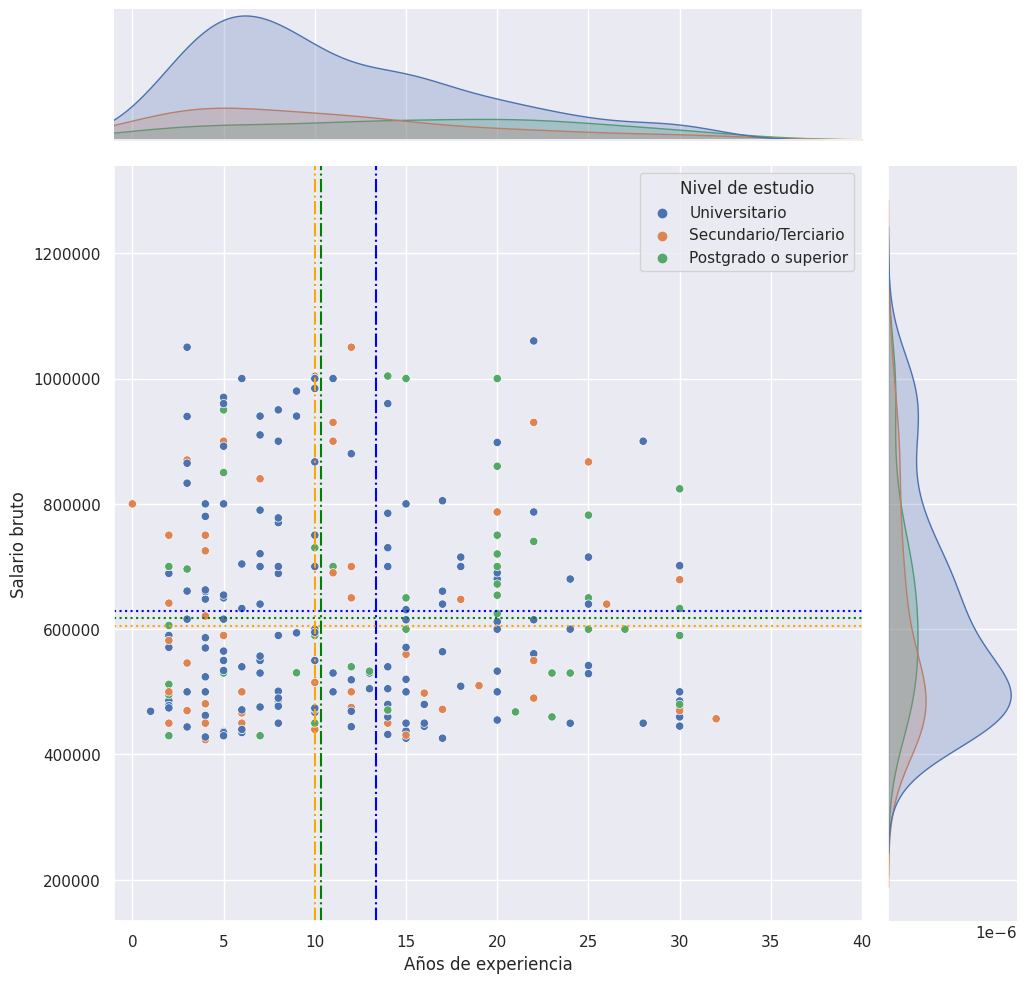

In [ ]:
df_curated.loc[:,'studies_lvl'] = df_curated.profile_studies_level.replace({
  'Terciario':'Secundario/Terciario',
  'Secundario':'Secundario/Terciario',
  'Posgrado/Especialización':'Postgrado o superior',
  'Maestría':'Postgrado o superior',
  'Doctorado':'Postgrado o superior',
  'Posdoctorado':'Postgrado o superior'})

seaborn.jointplot(data=df_curated[df_curated.profile_studies_level_state == 'Completo'].rename(columns={'studies_lvl':'Nivel de estudio'}), x='profile_years_experience', y="salary_monthly_BRUTO", hue='Nivel de estudio', height=10, xlim=(-1,40))

#MEDIAS DE POSGRADO O SUPERIOR
plt.axhline(df_curated[df_curated.studies_lvl == 'Postgrado o superior']["salary_monthly_BRUTO"].mean(), color='blue',
            linestyle=':', label='Media salario\Est. Postgrado o superior')
plt.axvline(df_curated[df_curated.studies_lvl == 'Postgrado o superior'].profile_years_experience.mean(), color='blue',
            linestyle='-.', label='Media experiencia\Est. Postgrado o superior')

#MEDIAS DE SECUNDARIO/TERCIARIO
plt.axhline(df_curated[df_curated.studies_lvl == 'Secundario/Terciario']["salary_monthly_BRUTO"].mean(), color='orange',
            linestyle=':', label='Media salario\Est. Secundario/Terciario')
plt.axvline(df_curated[df_curated.studies_lvl == 'Secundario/Terciario'].profile_years_experience.mean(), color='orange',
            linestyle='-.', label='Media experiencia\Est. Secundario/Terciario')

#MEDIAS DE UNIVERSITARIO
plt.axhline(df_curated[df_curated.studies_lvl == 'Universitario']["salary_monthly_BRUTO"].mean(), color='green',
            linestyle=':', label='Media salario\Est. Universitario')
plt.axvline(df_curated[df_curated.studies_lvl == 'Universitario'].profile_years_experience.mean(), color='green',
            linestyle='-.', label='Media experiencia\Est. Universitario')

plt.ylabel('Salario bruto')
plt.xlabel('Años de experiencia')
plt.ticklabel_format(style='plain', axis='y')

Donde se aprecia como los que poseen un nivel de estudio universitario completo son los que acreditan salarios mas altos y mas años de experiencia.
Otras observaciones destacan que si bien los que poseen un nivel de estudio de postgrado o superior, acreditan en media los mismos años de experiencia que aquellos con nivel de estudio secundario/terciario, los perfiles con una educacion superior reportan mayores salarios en promedio.